In [6]:
import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

from misc_process import normalize_max

%matplotlib inline

In [7]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2023-11-28-auss-dna2-nacl-bp-kinetic-effect', '')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_SI = os.path.join(BASE_DIR_PATH, 'results', 'figs', 'si_figs', 'png', '')
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')

In [8]:
df = pd.read_csv(DATA_UV_DIR_PATH + 'ar-2023-11-28-auss-dna2-bpconc-effect.csv', skiprows = 1, index_col='Wavelength (nm)')
df_5ul_bp = df.iloc[:,:122]

In [9]:
abs_5ul_bp = df_5ul_bp.iloc[:,0::2]

In [10]:
df_12_6nacl = df.iloc[:,122:244]
abs_12_6nacl = df_12_6nacl.iloc[:,0::2]

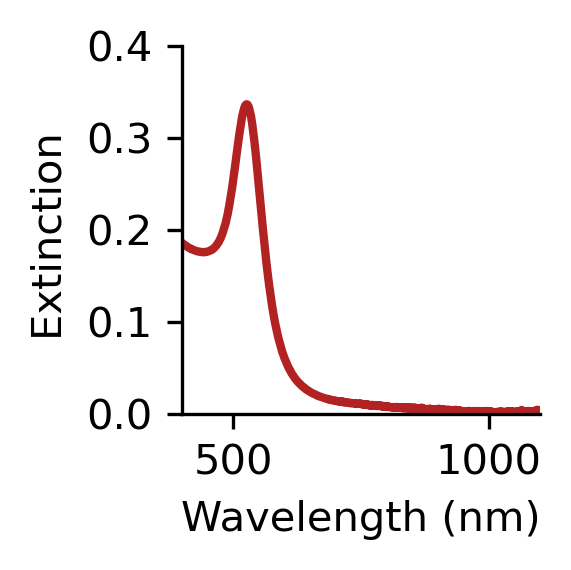

In [11]:
#================ plot data showing aggregation ===========================#

fig = plt.figure(figsize=(2,2), dpi=300) # generate a figure

ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

for i in abs_12_6nacl:
    if i == 'Abs.61':
        colors = 'firebrick'
        linewidth = 2 
    elif i == 'Abs.121':
        colors = 'royalblue'
        linewidth = 0
    else:
        colors = 'grey'
        linewidth = 0

    ax.plot(abs_12_6nacl[i], color = colors, linewidth = linewidth)                           # plot data    
    
ax.set_xlim([400,1100])                    # set wavelength limit
ax.set_ylim([0,0.4])                       # set absorbance limit
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction ')              # set axis label
#ax.axvline(670)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  
fig.savefig(RESULT_DIR_PATH_SI + 'Fig_S1a.png', bbox_inches='tight')